# Aufgaben der vierten Vorlesung
**Aufgabe 1**

In [109]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Country-data.csv')
df.drop_duplicates()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [110]:
df_dic = pd.read_csv('data-dictionary.csv')
df_dic

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given in % o...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


Mit diesen Daten können Länder hinsichtlich ihres Entwicklungsstandes kategorisiert werden. Beispielsweise spricht eine hoher Wert beim Kindersterben gegen, ein hoher Wert bei der Lebenserwartung dagegen für eine hohe Entwicklung des Landes

**Aufgabe 2**

In [111]:
df.duplicated().sum()

np.int64(0)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [113]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [114]:
num_vars = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


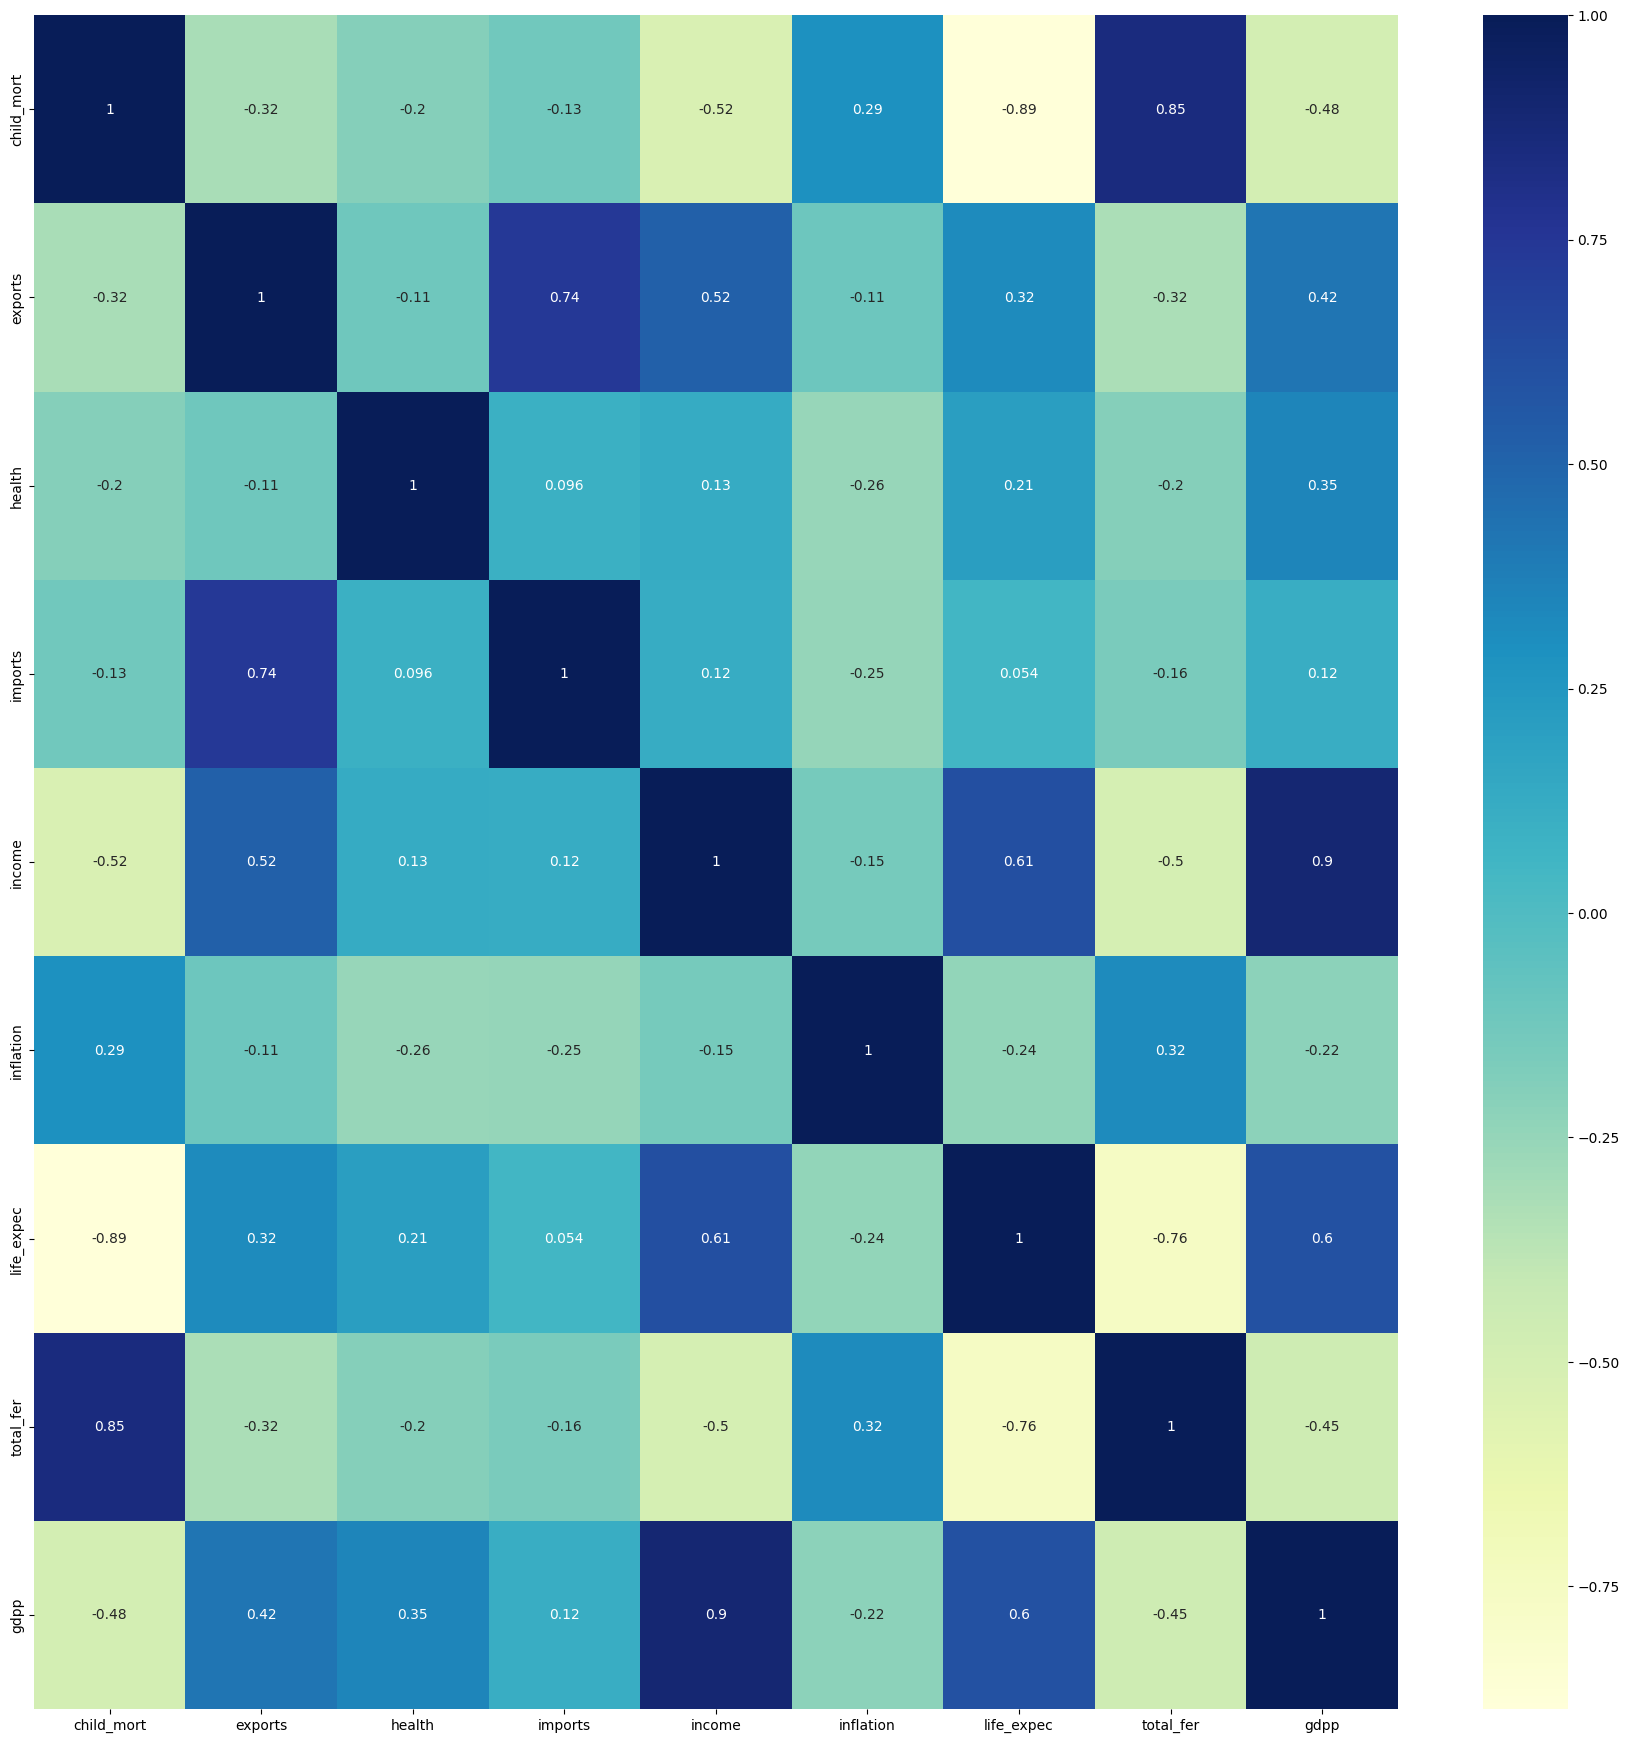

In [115]:
plt.figure(figsize = (22, 22))
sns.heatmap(df[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

Die drei größten Abhändigkeiten:

- income und gdpp (0,9)
- child_mort und life_expec (-0,89)
- child_mort und total_fer (0,85)

**Aufgabe 3**

In [116]:
from sklearn import decomposition

In [117]:
pca = decomposition.PCA()
pca_result = pca.fit_transform(df[num_vars])

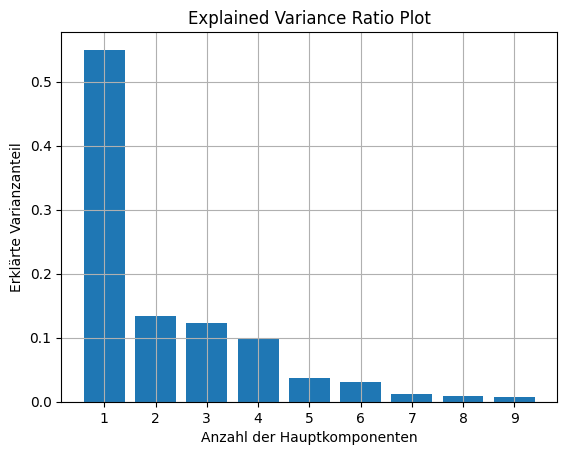

In [118]:
explained_variance = pca.explained_variance_ratio_

x_ticks = range(1, len(pca.explained_variance_ratio_) + 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, tick_label=x_ticks)
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Erklärte Varianzanteil')
plt.title('Explained Variance Ratio Plot')
plt.grid()

plt.show()

Da ab der vierten Hauptkomponente ein deutlicher Abfall zu sehen ist und wir mit vier bereits über 75% abdecken, werden nur 4 Hauptkomponenten einbezogen

**Aufgabe 4**

In [119]:
pca = decomposition.PCA(n_components=4)
pca_result = pca.fit_transform(df[num_vars])

In [120]:
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['country'] = df['country']
pca_df.head()

,PC1,PC2,PC3,PC4,country
0,0.599078,0.095490,0.157554,0.024333,Afghanistan
1,-0.158474,-0.212092,-0.064189,0.061247,Albania
2,-0.003686,-0.135867,-0.134182,-0.133574,Algeria
3,0.650235,0.275975,-0.142672,-0.156018,Angola
4,-0.200711,-0.064662,-0.100715,0.037902,Antigua and Barbuda


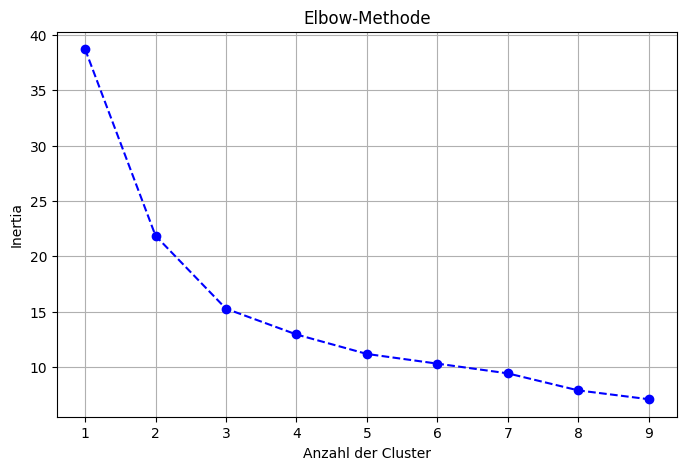

In [121]:
from sklearn.cluster import KMeans

# Elbow-Methode: Berechnung der Trägheitswerte (Inertia) für verschiedene Clusterzahlen
wcss = []
k_range = range(1, 10)  # Clusteranzahl von 1 bis 10 testen

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot der Elbow-Methode
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Methode')
plt.xticks(k_range)
plt.grid(True)
plt.show()


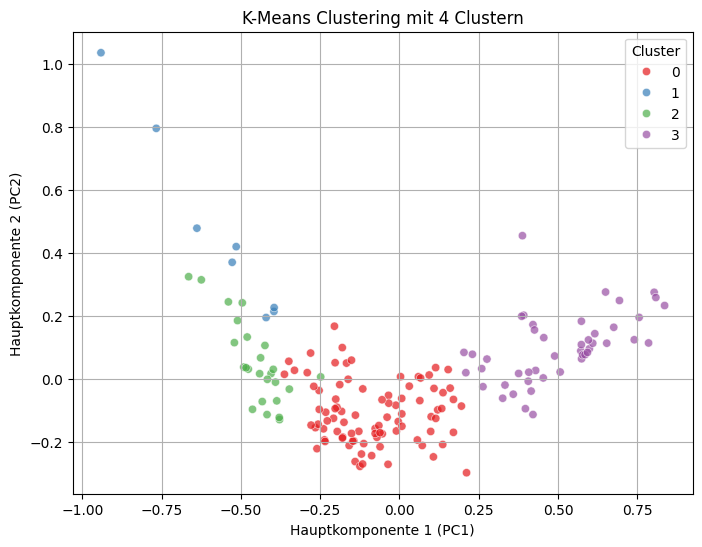

In [122]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(pca_result)

pca_df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='Set1', alpha=0.7)
plt.xlabel('Hauptkomponente 1 (PC1)')
plt.ylabel('Hauptkomponente 2 (PC2)')
plt.title('K-Means Clustering mit 4 Clustern')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [123]:
clustered_countries = df[['country']].copy()
clustered_countries['Cluster'] = clusters

cluster_groups = clustered_countries.groupby('Cluster')['country'].apply(list)
cluster_groups

Cluster
0    [Albania, Algeria, Antigua and Barbuda, Argent...
1    [Brunei, Ireland, Kuwait, Luxembourg, Malta, Q...
2    [Australia, Austria, Belgium, Canada, Cyprus, ...
3    [Afghanistan, Angola, Benin, Burkina Faso, Bur...
Name: country, dtype: object

In [124]:
clustered_countries.sort_values(by="Cluster", inplace=True)
clustered_countries

,country,Cluster
1,Albania,0
2,Algeria,0
5,Argentina,0
4,Antigua and Barbuda,0
6,Armenia,0
...,...,...
149,Timor-Leste,3
150,Togo,3
132,Sierra Leone,3
165,Yemen,3


In [125]:
# Funktion zum Exportieren der Cluster-Daten als CSV VON CHATGPT
def export_clusters_to_csv(df, filename="clustered_countries.csv"):
    """
    Exportiert den DataFrame mit Ländern und zugehörigen Clustern als CSV-Datei.

    :param df: DataFrame mit den Ländern und Clustern
    :param filename: Name der zu speichernden Datei
    """
    file_path = f"./{filename}"
    df.to_csv(file_path, index=False)
    return file_path

# Funktion aufrufen und Datei speichern
csv_file_path = export_clusters_to_csv(clustered_countries)
csv_file_path

'./clustered_countries.csv'

4 Kluster:
- 0: mittelmäßig entwickelte Länder wie z.B. Indonesien, Peru, Albanien, Ägypten, Mongolei
- 1: sehr entwickelte Länder wie z.B. Luxemburg, Irland, Malta, UAE, Singapur
- 2: gut entwickelte Länder wie z.B. Deutschland, Japan, Schweiz, USA, UK
- 3: unterentwickelte Länder wie z.B. Senegal, Irak, Yemen, Pakistan, Chad

**Aufgabe 5**

- Die ersten vier Hauptkomponenten erklären ~76 % der Gesamtvarianz.
- Eine Reduktion auf diese 4 Komponenten war sinnvoll, um die Anzahl der Dimensionen zu verringern, ohne zu viel Information zu verlieren.
- Die Hauptkomponenten wurden als neue Merkmale für das Clustering verwendet.

- Die Elbow-Methode zeigte, dass 3 oder 4 Cluster eine sinnvolle Wahl sind.
- Scatterplots von PC1 vs. PC2 zeigten eine gute Trennung der Cluster.

- Mit 3 Clustern erhält man eine grobe Einteilung in arme, mittlere und wohlhabende Länder.
- Mit 4 Clustern werden die kleinen Hochleistungsökonomien separat erfasst.